In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

##### Import data

In [2]:
# set the file path of the raw data
raw_data_file = os.path.join('data', 'raw', '20201211 Software Developer Interview Assignment Data.xlsx')

# Read the data with all default parameteres
df_raw = pd.read_excel(raw_data_file, sheet_name="Messages Raw")

##### Basic structure of the dataset

In [3]:
# use .info() to get brief information about a dataframe
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113385 entries, 0 to 113384
Data columns (total 6 columns):
Datetime         113198 non-null object
UserID           113385 non-null object
Original Text    0 non-null float64
Translation      0 non-null float64
Intent           113385 non-null object
Confidence       113349 non-null float64
dtypes: float64(3), object(3)
memory usage: 5.2+ MB


In [4]:
# Use .head() to get the top 5 rows in the dataset
df_raw.head()

,Datetime,UserID,Original Text,Translation,Intent,Confidence
0,2020-03-02 10:21:02,ca082cbe-7c5e-4d1c-a658-4d2f9d0d4269,NaN,NaN,ok_thanks,0.315921
1,2020-03-02 10:31:44,c2df2d0b-af6c-4511-a8dc-db45890feb1b,NaN,NaN,medication_general,0.370137
2,2020-03-02 10:31:47,748630f3-35c4-40a3-b1ec-57f73d2a1d2e,NaN,NaN,ok_thanks,0.511490
3,2020-03-02 10:31:49,1ede6dbb-8bd3-4078-9b29-91abcfd66270,NaN,NaN,pain,0.882618
4,2020-03-02 10:31:51,ea27f6ed-7bd5-4e84-8b7a-3621ff39a893,NaN,NaN,stool,0.239572


In [5]:
# Use .tail() to get the bottom 5 rows in the dataset
df_raw.tail()

,Datetime,UserID,Original Text,Translation,Intent,Confidence
113380,2020-06-03 06:35:14,17ce85ff-f95b-48c5-a460-d4cd511b8102,NaN,NaN,pregnancy_general,0.345122
113381,2020-06-03 06:35:21,e1a8b7fb-4684-4d91-87fd-f7807dc4644d,NaN,NaN,qsurvey_positive,0.470811
113382,2020-06-03 06:35:28,e2b30734-5ff1-49ee-8535-74c69f3119eb,NaN,NaN,survey_response,0.999694
113383,2020-06-03 06:35:35,66b42759-2be2-43e9-9dcf-507fa4c18698,NaN,NaN,fatigue_sleep,0.773429
113384,2020-06-03 06:35:42,bd763922-7408-4169-a001-df9042b66e7e,NaN,NaN,discharge,0.932706


In [6]:
#Get detailed information about the dataset
#It counts the number of values and show mean, std, min and max values as well as 
# 25%, 50% and 75% quantiles.
df_raw.describe(include="all")

,Datetime,UserID,Original Text,Translation,Intent,Confidence
count,113198,113385,0.0,0.0,113385,113349.000000
unique,112766,26619,NaN,NaN,64,NaN
top,2020-05-06 15:53:55,26bc52f2-ceab-4b0a-9dcf-3108273ad00d,NaN,NaN,ok_thanks,NaN
freq,3,676,NaN,NaN,21567,NaN
mean,NaN,NaN,NaN,NaN,NaN,0.739137
std,NaN,NaN,NaN,NaN,NaN,0.240192
min,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,0.529344
50%,NaN,NaN,NaN,NaN,NaN,0.787549
75%,NaN,NaN,NaN,NaN,NaN,0.977372


##### Inspect the data

#### Data munging: Working with missing values

In [7]:
#Make a checkpoint of the df 
df = df_raw.copy()

In [8]:
#Use .isnull().sum() to get count of missing values
df.isnull().sum()

Datetime            187
UserID                0
Original Text    113385
Translation      113385
Intent                0
Confidence           36
dtype: int64

In [9]:
# use .info() to detect missing values if any
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113385 entries, 0 to 113384
Data columns (total 6 columns):
Datetime         113198 non-null object
UserID           113385 non-null object
Original Text    0 non-null float64
Translation      0 non-null float64
Intent           113385 non-null object
Confidence       113349 non-null float64
dtypes: float64(3), object(3)
memory usage: 5.2+ MB


##### Feature: Translation & Original Text	

> The Original Text	and Translation features are null so we can just drop the columns

In [10]:
df.drop(['Original Text','Translation'], inplace=True, axis=1)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113385 entries, 0 to 113384
Data columns (total 4 columns):
Datetime      113198 non-null object
UserID        113385 non-null object
Intent        113385 non-null object
Confidence    113349 non-null float64
dtypes: float64(1), object(3)
memory usage: 3.5+ MB


##### Feature: Confidence

In [12]:
#Lets inspect rows of the confidence feature with missing values
df[df['Confidence'].isna()].head()

,Datetime,UserID,Intent,Confidence
342,2020-03-02 10:16:42,316f7e7e-3bd1-49dd-88e4-df3910c9ea26,1,NaN
343,2020-03-02 10:16:44,316f7e7e-3bd1-49dd-88e4-df3910c9ea26,2,NaN
344,2020-03-02 10:16:46,316f7e7e-3bd1-49dd-88e4-df3910c9ea26,3,NaN
345,2020-03-02 10:16:48,316f7e7e-3bd1-49dd-88e4-df3910c9ea26,4,NaN
346,2020-03-02 10:16:50,316f7e7e-3bd1-49dd-88e4-df3910c9ea26,4,NaN


In [13]:
df_raw.iloc[1030:1054]

,Datetime,UserID,Original Text,Translation,Intent,Confidence
1030,2020-03-03 14:16:36,06f783ca-293f-45da-bb0a-967a9c9aa4b1,NaN,NaN,0.984751,NaN
1031,2020-03-03 14:16:38,1fe17986-6821-4967-945c-787d931fde85,NaN,NaN,0.996653,NaN
1032,2020-03-03 14:16:42,0f477218-b621-4a59-862d-f95be4db9241,NaN,NaN,0.471802,NaN
1033,2020-03-03 14:16:45,0f477218-b621-4a59-862d-f95be4db9241,NaN,NaN,0.593167,NaN
1034,2020-03-03 14:16:47,71676102-822e-4ac7-89f0-07ddce541749,NaN,NaN,0.608875,NaN
1035,2020-03-03 14:16:49,ead45c6a-5bf9-47f5-a763-bb0a54ded37b,NaN,NaN,0.992901,NaN
1036,2020-03-03 14:16:52,71676102-822e-4ac7-89f0-07ddce541749,NaN,NaN,0.992257,NaN
1037,2020-03-03 14:16:54,1dc8a6f6-5bfc-49b9-b54b-6c8c381ecbc4,NaN,NaN,0.345861,NaN
1038,2020-03-03 14:31:59,11282349-f2d5-43ff-b6f2-d34d1451fa2c,NaN,NaN,0.716361,NaN
1039,2020-03-03 14:32:01,01e7828b-6b29-4f3d-81ac-6b43f24f04dc,NaN,NaN,0.581737,NaN


We have 35 missing values
> After further inspecting, we notice that the wherever there are missing values in the Confidence column, the Intent is a numeric value. This data is not so useful for our analysis. 

>For this reason, we can just drop the raws


In [14]:
df = df[df['Confidence'].notna()]

In [15]:
# We can inspect to see that the null Confidence rows have been dropped
df.isnull().sum()

Datetime      186
UserID          0
Intent          0
Confidence      0
dtype: int64

##### Feature: Datetime

In [16]:
#convert column to datetime

df['Datetime'] = pd.to_datetime(df['Datetime'])

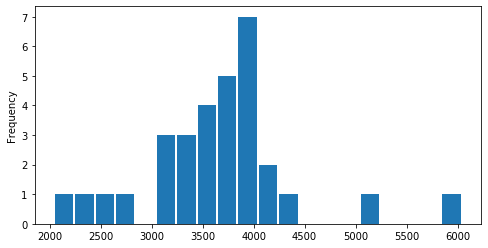

In [17]:
# use hist to create a histogram of the days in the dataset
df["Datetime"].groupby([df["Datetime"].dt.day]).count().plot(
                        kind="hist", figsize=(8,4), bins=20, rwidth=0.9);


We can impute the missing values using the mean datetime

In [18]:
df['Datetime'].fillna(df['Datetime'].mean(), inplace=True)

In [19]:
# We can inspect to see that the null datetime rows have been imputed and we have no missing values
df.isnull().sum()

Datetime      0
UserID        0
Intent        0
Confidence    0
dtype: int64

# Task 1

In [20]:
users_journey = {}
def user_path(x):
    """
    function to generate a user path
    Args:
        x (obj): pandas group
    """
    path = []
    if len(x['UserID']) > 1:
        user_id = ''
        for i in range(len(x)):
            item = x.iloc[i:i+1]
            date = item['Datetime'].dt.date.values.item().strftime("%Y-%m-%d")
            intent = item['Intent'].values.item()
            user_id = item['UserID'].values.item()
            path.append(f"{i+1}). {date}:{intent}")
        users_journey.update({user_id:path})

In [21]:
# Generate an object of user journey
df.groupby(['UserID']).apply(user_path)

""


In [22]:
# Convert the object into a dataframe
user_journey_df = pd.DataFrame(users_journey.items(), columns=['UserID', 'UserJourney'])

In [23]:
# Inspect the User Journey data
user_journey_df.head(5)

,UserID,UserJourney
0,00016fab-f4a4-4923-a013-85f41f396b77,"[1). 2020-05-15:pain, 2). 2020-05-18:medicatio..."
1,0004e27e-89c2-4290-9325-d452814e112b,"[1). 2020-04-21:ok_thanks, 2). 2020-04-23:edd,..."
2,000b15b5-5f33-45ca-9ce8-eb9bf937ad2b,"[1). 2020-05-15:ok_thanks, 2). 2020-05-15:ok_t..."
3,001153d9-b0d2-4942-9d60-975974d17071,"[1). 2020-05-25:qsurvey_negative, 2). 2020-05-..."
4,0013e148-94f9-4342-b940-b2b22bc871df,"[1). 2020-05-04:pregnancy_anc_visits, 2). 2020..."


In [24]:
# We have 17,489 userjourneys 
user_journey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17490 entries, 0 to 17489
Data columns (total 2 columns):
UserID         17490 non-null object
UserJourney    17490 non-null object
dtypes: object(2)
memory usage: 273.4+ KB


> We need to create a dataframe with a separator between each user entry in oder to distinguish them easily

In [26]:
# Create a dataframe with the column names as the values
df2 = pd.DataFrame([[''] * len(
    user_journey_df.columns), user_journey_df.columns], columns=user_journey_df.columns)

In [27]:
# Inspect the DF
df2

,UserID,UserJourney
0,,
1,UserID,UserJourney


In [28]:
# Create a dataframe with the row separator
df1= (user_journey_df.groupby('UserID', group_keys=False)
        .apply(lambda d: d.append(df2))
        .iloc[:-2]
        .reset_index(drop=True))

In [29]:
# As seen from the dataframe, each row has a separator indicating the values
df1.head(5)

,UserID,UserJourney
0,00016fab-f4a4-4923-a013-85f41f396b77,"[1). 2020-05-15:pain, 2). 2020-05-18:medicatio..."
1,,
2,UserID,UserJourney
3,0004e27e-89c2-4290-9325-d452814e112b,"[1). 2020-04-21:ok_thanks, 2). 2020-04-23:edd,..."
4,,


In [30]:
# Expand the "UserJourney" row values and create a row entry for each
user_journey_df = df1.explode('UserJourney')

##### Justification for using Excel
---
> Most people who don't habe a technical background can easily visualize the data in an excel format. Since pandas has a method to directly export a dataframe to an excel sheet, we are going to use it to output the data.

In [31]:
# Write the data into an excel sheet

user_journey_df.to_excel(os.path.join("data", "processed", "UserJourney.xlsx"), sheet_name="User Journey", index=False)

# Task 2

> #### Further analysisi

In [32]:
# Dataframe checkpoint
df_ = df.copy()

> ###### Correlation Matrix

In [33]:
# Represent intents using dummy variables 
dummies = pd.get_dummies(df['Intent'], drop_first=True).rename(columns=lambda x: 'Intent_' + str(x))
df = pd.concat([df, dummies], axis=1)
# df.drop(['Intent'], inplace=True, axis=1)

In [34]:
# Generate the correlation matrix
corr = df.corr()

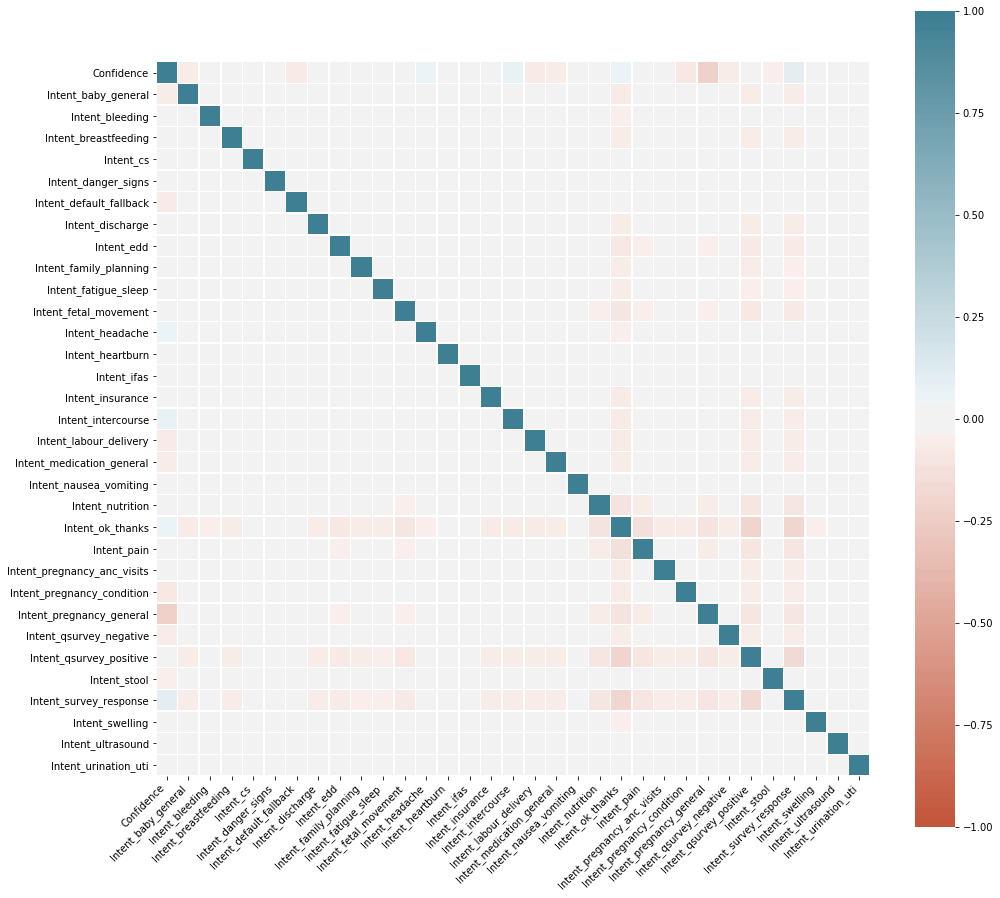

In [35]:
# Plot a correlation matrix using a heatmap
plt.figure(figsize = (16,15))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, linewidths=.5
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

> There seems to be a no correlation between any pair of the intents. This implies that no intent response directly affects the other. 

> ###### Scatter Plot

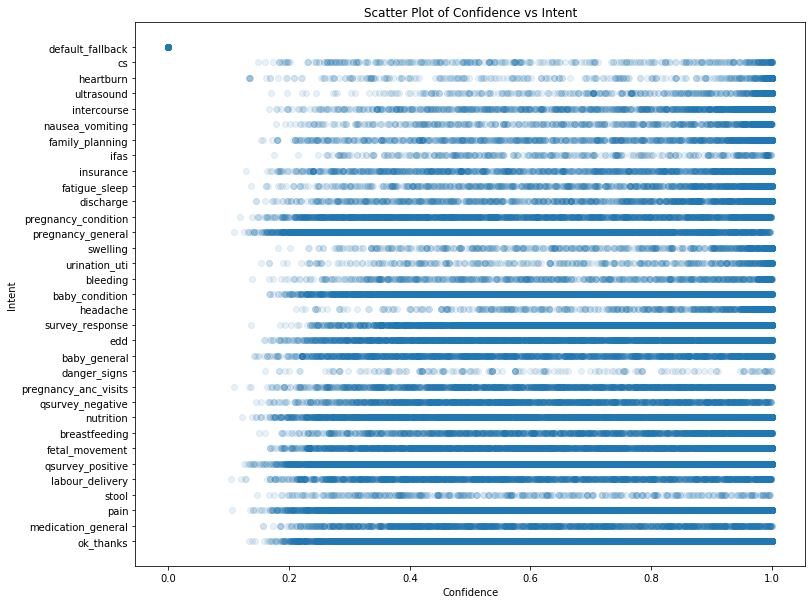

In [36]:

fig, ax = plt.subplots(figsize = (12,10))
ax.scatter(df["Confidence"], df["Intent"], alpha=0.1)
plt.title("Scatter Plot of Confidence vs Intent")
plt.xlabel("Confidence")
plt.ylabel("Intent")
plt.show()

From the scatter plot we can see that the NLP model assigned the lowest confidence to the default fallback response.

The model really does well if the if the intent of the message is related to `mother's pregnancy`, `the baby` or `survey`.

The model's confidence level in the response to generic topics such as `headache`, `danger signs`, `heartburn`, etc, is low because of the wide range of possible reasons for the issues.

> ##### NLP model confidence per hour

In [37]:
df['hour'] = df['Datetime'].dt.hour

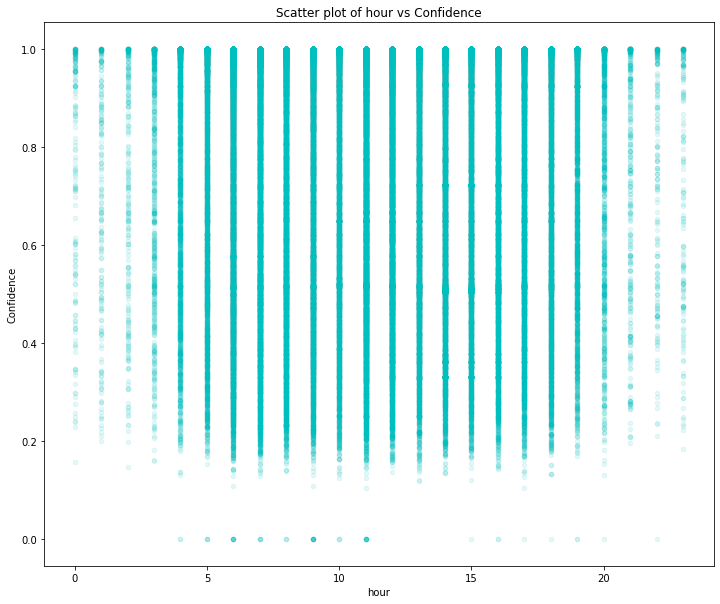

In [38]:
df.plot(kind='scatter', x="hour", y='Confidence', color='c', 
        figsize = (12,10), alpha=0.1, title="Scatter plot of hour vs Confidence");

> As we can see from the scatter plot, the NLP model confidence level in it's reply is higher during the day as compared to noght hours. This could be because, less mothers ask questions during the night and the questions will most likely be an emmergency hence being very variant.